# Averaging datasets for a better signal

In [1]:
%matplotlib inline

import sys
sys.path.append('./..')

import spectrum_fitting
from spectrum_fitting import PeakParams

Sometimes it may be desirable or necessary to average the data to improve the signal to noise ratio. This means combining a signal from multiple cakes. As before we load a data file in the same way.

Diffraction pattern successfully loaded from file.


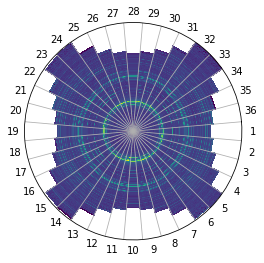

In [2]:
spectral_data = spectrum_fitting.FitSpectrum('../example_data/adc_041_7Nb_NDload_700C_15mms_00001.dat', 90)
spectral_data.plot_polar()

## Analysis with multiple cakes

We can plot the spectrum of multiple cakes on the same plot by providing a list of the desired cake numbers.

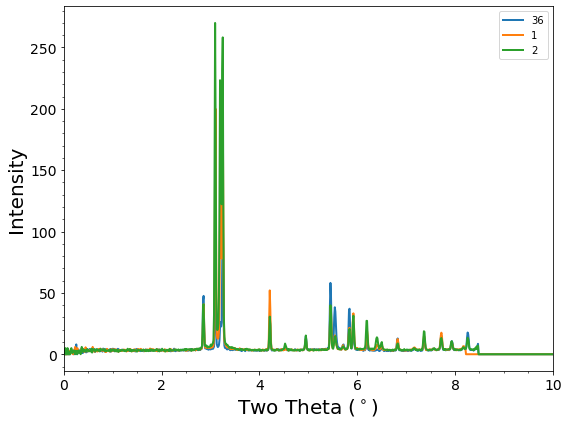

In [3]:
spectral_data.plot([36, 1, 2])

In order to improve the quality of the analysed dataset we may want to sum multiple adjacent cakes to smooth the signal. This will increase the peak height but will also increase the noise floor.

We can do this by specifying the merge cakes parameter and the intensities of the specified cakes will be summed:

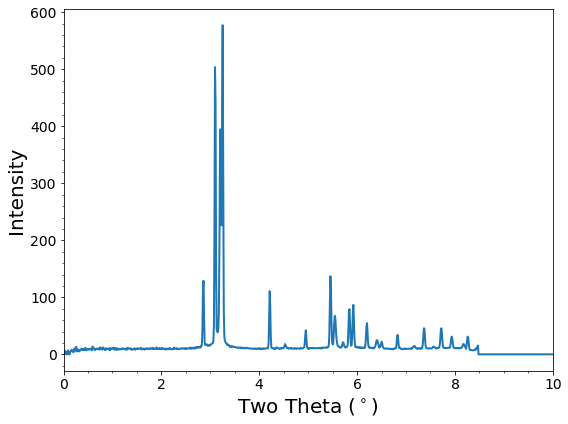

In [4]:
spectral_data.plot([36, 1, 2], merge_cakes=True)

Notice how the intensity compares to the unmerged cakes above - it is the sum of all of the cakes.

Since it is not always easy to visualise which cakes number refers to which cake, there is a helper method `highlight_cakes` which will plot a schematic of the diffraction pattern, highlighting which cakes have been selected.

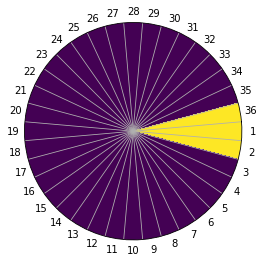

In [5]:
spectral_data.highlight_cakes([36, 1, 2])

Fitting to merged cakes requires specifying multiple cakes in the fit method but otherwise is the same syntax as fitting a single cake .

Fitting complete.


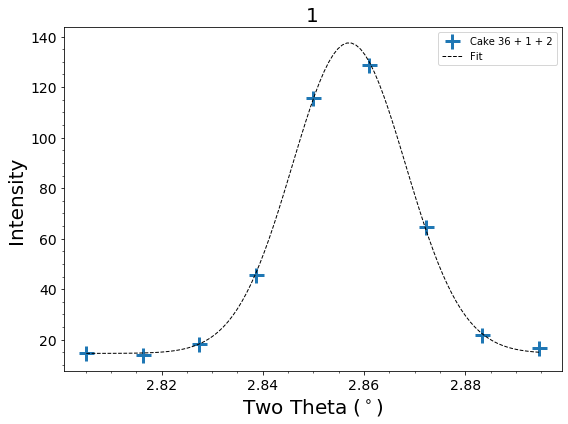

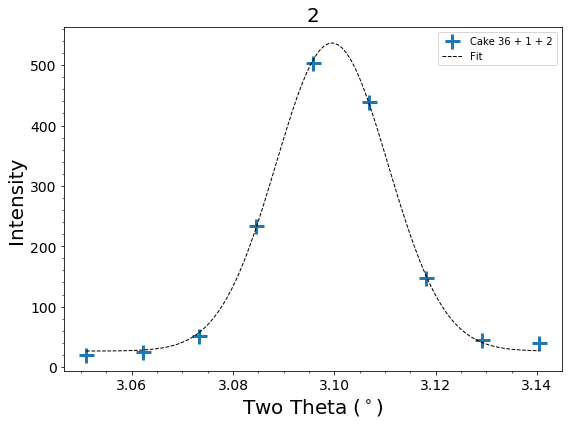

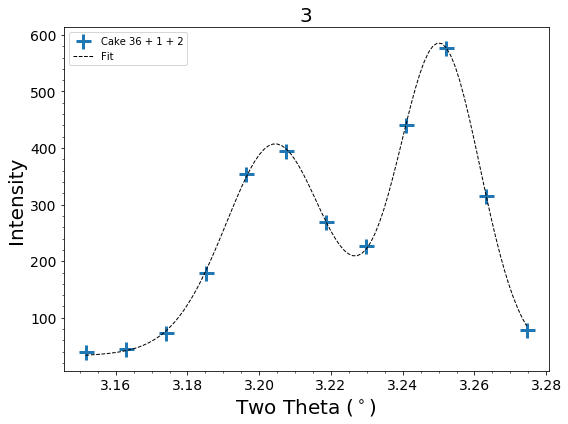

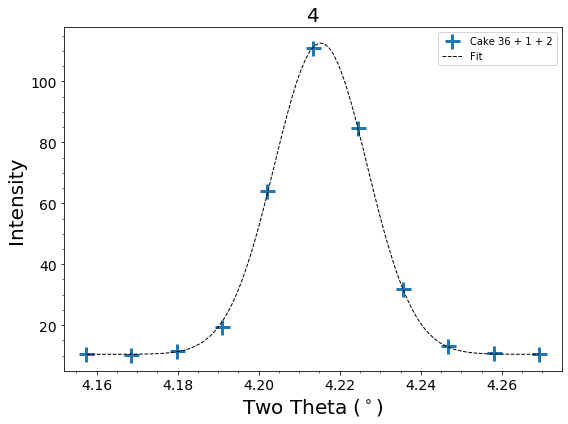

In [6]:
peak_params = [PeakParams('1', (2.8, 2.9)),
               PeakParams('2', (3.05, 3.15)),
               PeakParams('3',  (3.15, 3.28), 2, {"1_min": 3.17, "1_max": 3.24, "2_min": 3.225, "2_max": 3.28}),
               PeakParams('4', (4.15, 4.28))]
spectral_data.fit_peaks(peak_params, [36, 1, 2], merge_cakes=True)

for fit in spectral_data.fitted_peaks:
    fit.plot()

If we choose not to merge the cakes then the fit will use all of the individual data points to weight the fit. This effectively means that all of the cakes are plotted and the fit attempts to find a middle ground between them.

Fitting complete.


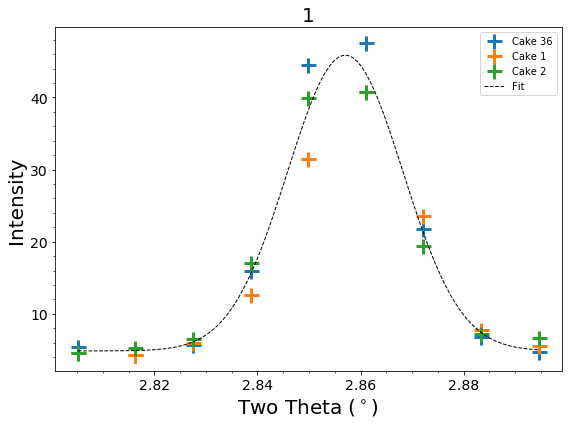

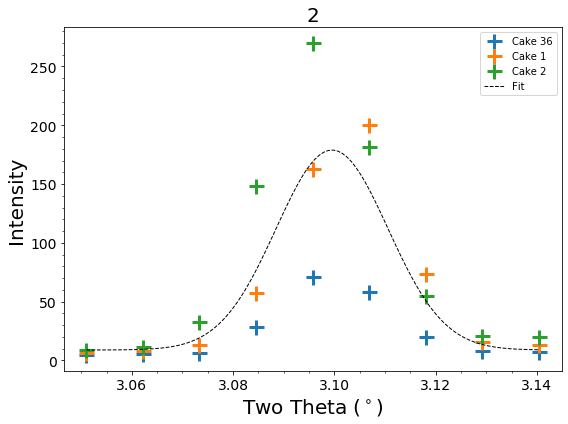

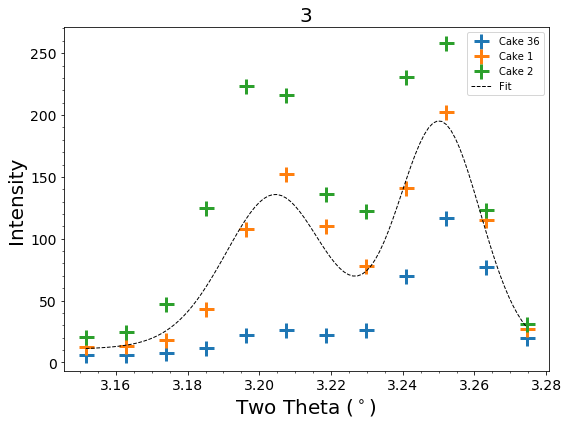

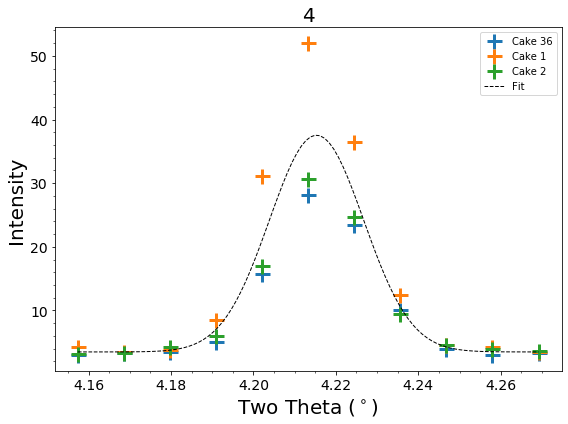

In [7]:
spectral_data.fit_peaks(peak_params, [36, 1, 2], merge_cakes=False)

for fit in spectral_data.fitted_peaks:
    fit.plot()